## Models initialization

In [51]:
import torch
import torchvision.models as models

model_dict = {
      'AlexNet':    models.alexnet(pretrained=True),
          'VGG':    models.vgg19_bn(pretrained=True),
    'GoogleNet':    models.googlenet(pretrained=True),
       'ResNet':    models.resnet152(pretrained=True),
      'ResNeXt':    models.resnext101_32x8d(pretrained=True)
}

## Images

In [52]:
import matplotlib.pyplot as plt
import math
from PIL import Image
import os

directory_originals = os.path.join('..', 'dataset', 'originals')
directory_modified = os.path.join('..', 'dataset', 'modified')
originals = {}
modified = {}

def display_images(images, columns=5, width=20, row_height=3.5, font_size=20, title=""):
    rows = math.ceil(len(images) / columns)
    fig = plt.figure(figsize=(width, row_height * rows))
    fig.suptitle(title, fontsize=font_size, x=0.14)

    for i, img in enumerate(images):
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(images[img])
        plt.title(label=img)
        plt.axis("off")

def resize_all_images():
    global originals
    for img in originals:
        originals[img] = originals[img].resize((256,256))
    for img in modified:
        modified[img] = modified[img].resize((256,256))

def get_all_images():
    global directory_originals, directory_modified, originals, modified
    all_photos = os.listdir(directory)
    for x in all_photos:
        x_path_original = os.path.join(directory_originals, x)
        x_path_modified = os.path.join(directory_modified, x)
        originals[x[:-4]] = Image.open(x_path_original) # x[:-4] - key of dir is filename without .jpg postfix
        modified[x[:-4]] = Image.open(x_path_modified)
    resize_all_images()

get_all_images()

## Image transformations for models inputs

In [53]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.CenterCrop(227),         # Crop the image to 227x227 pixels from center
    transforms.ToTensor(),              # Convert image to PyTorch Tensor data type
    transforms.Normalize(               # Normalizing image
        mean=[0.485, 0.456, 0.406],     # Mean and std same as used on training data
        std=[0.229, 0.224, 0.225]
    )
])

## Getting class names from file

In [54]:
with open('imagenet_classes.txt') as f:
    classes = [line.split(", ")[1].strip() for line in f.readlines()]

## Recognition and visualizing results

'DONE'

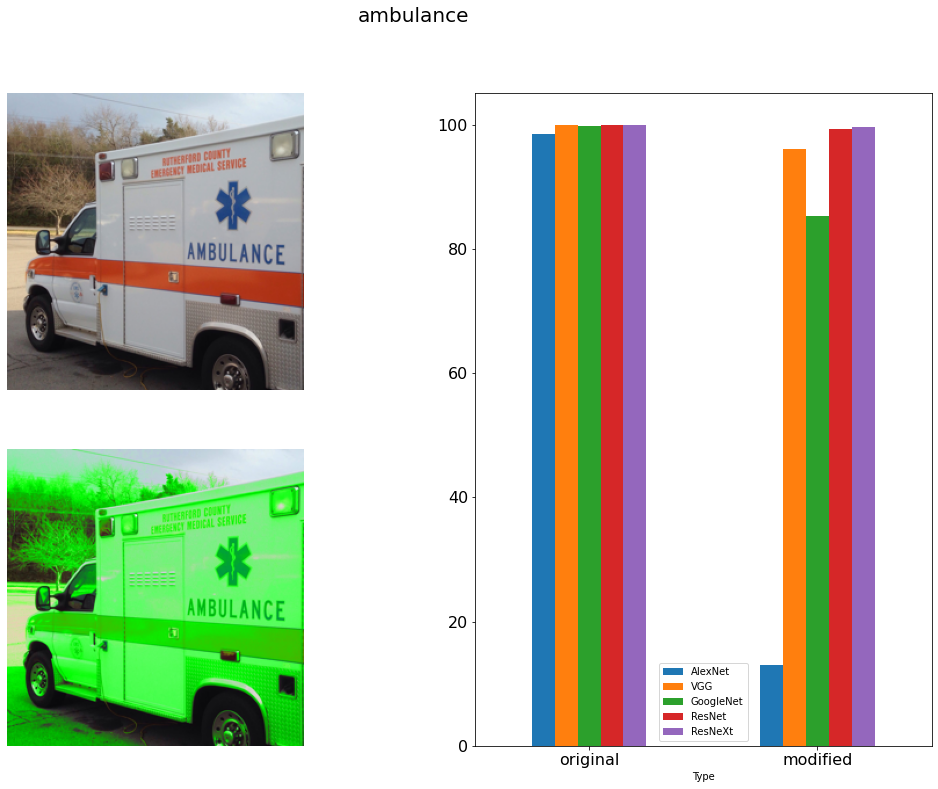

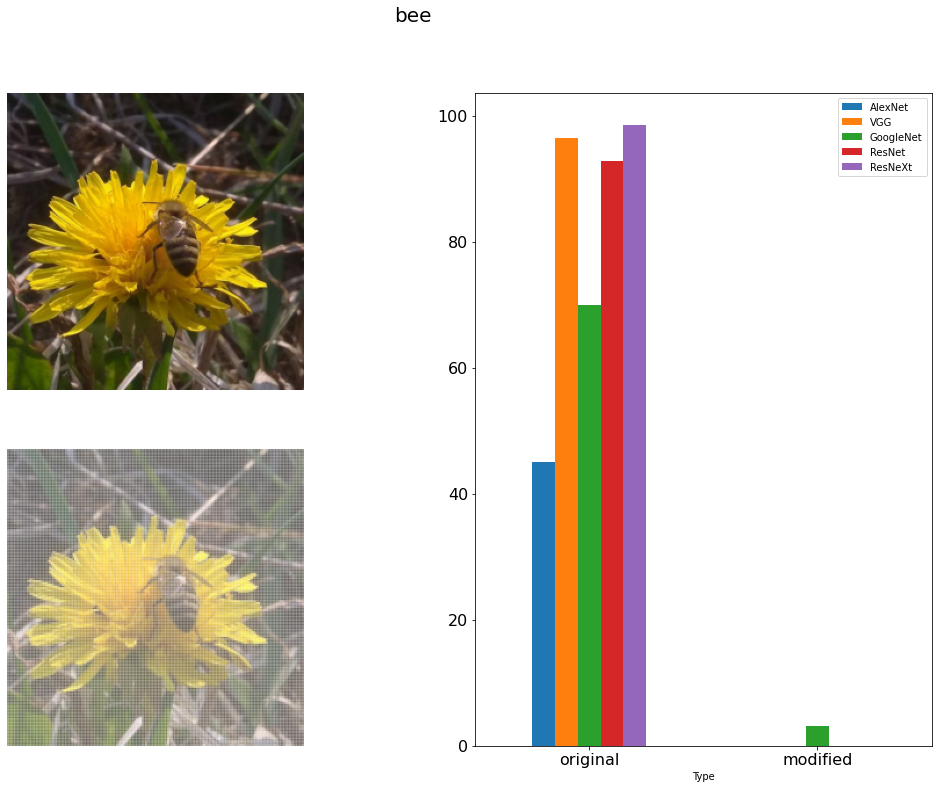

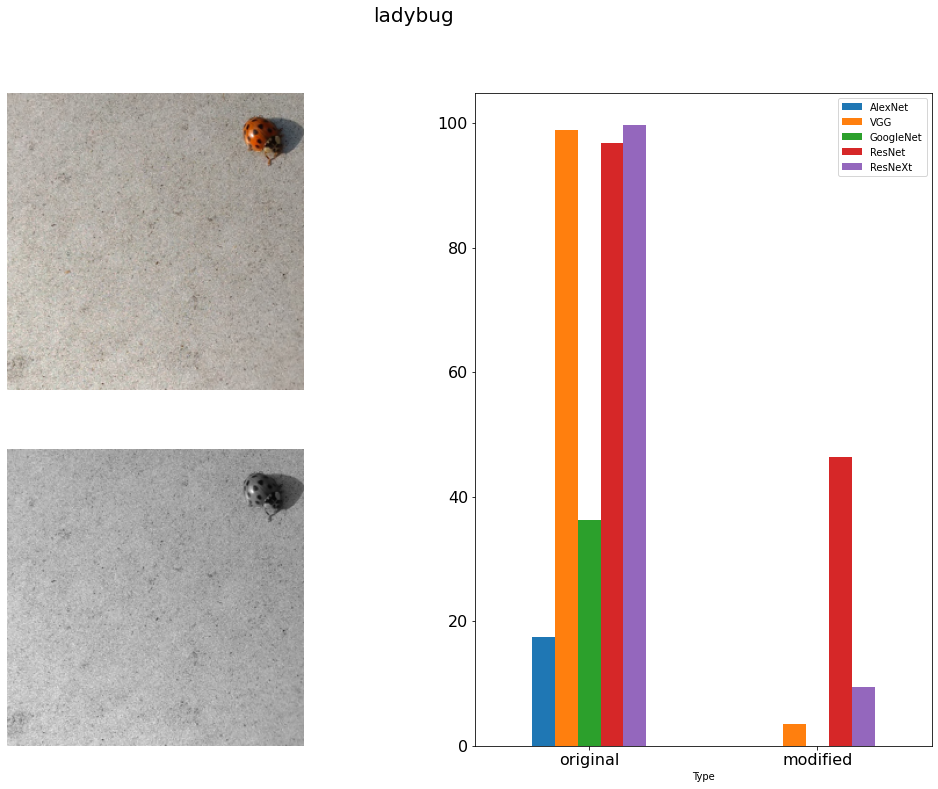

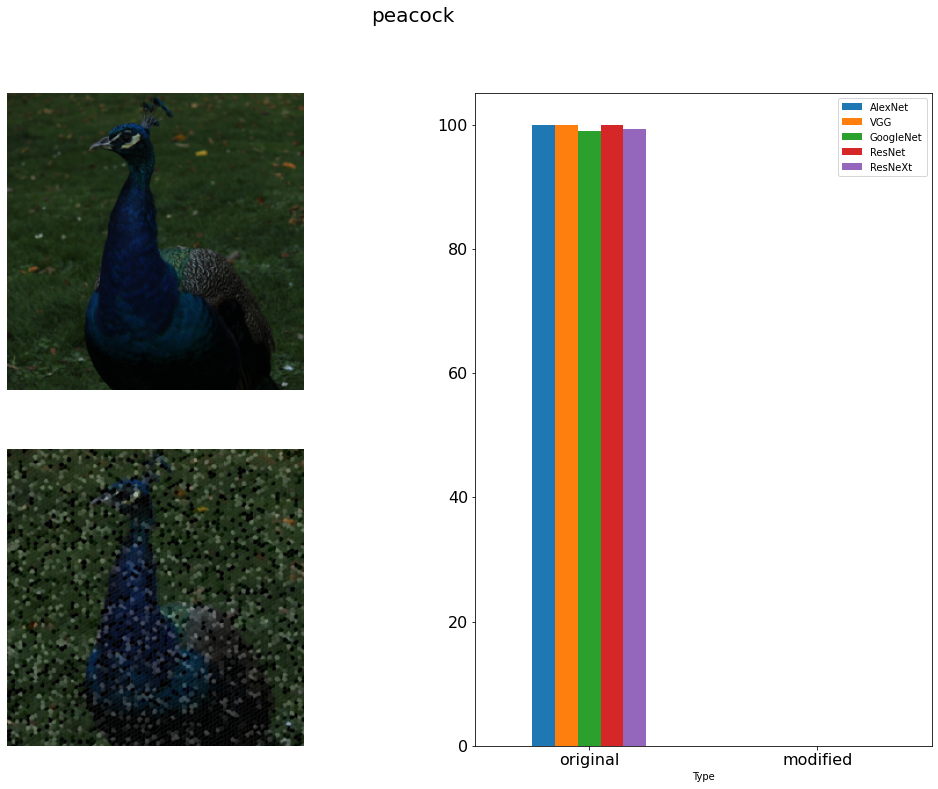

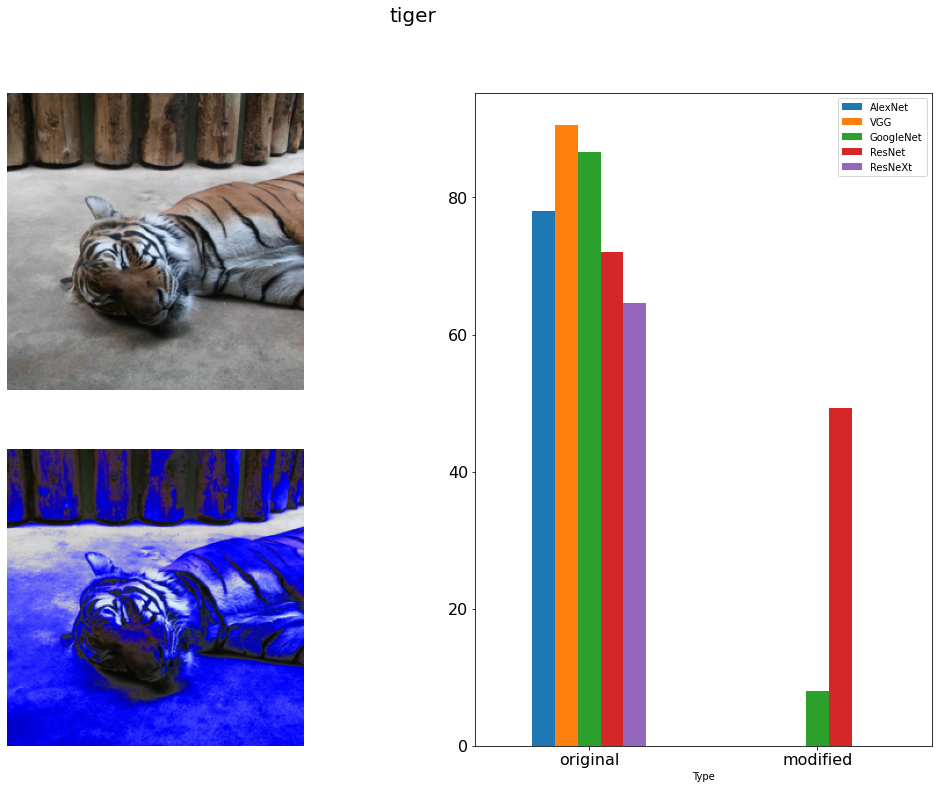

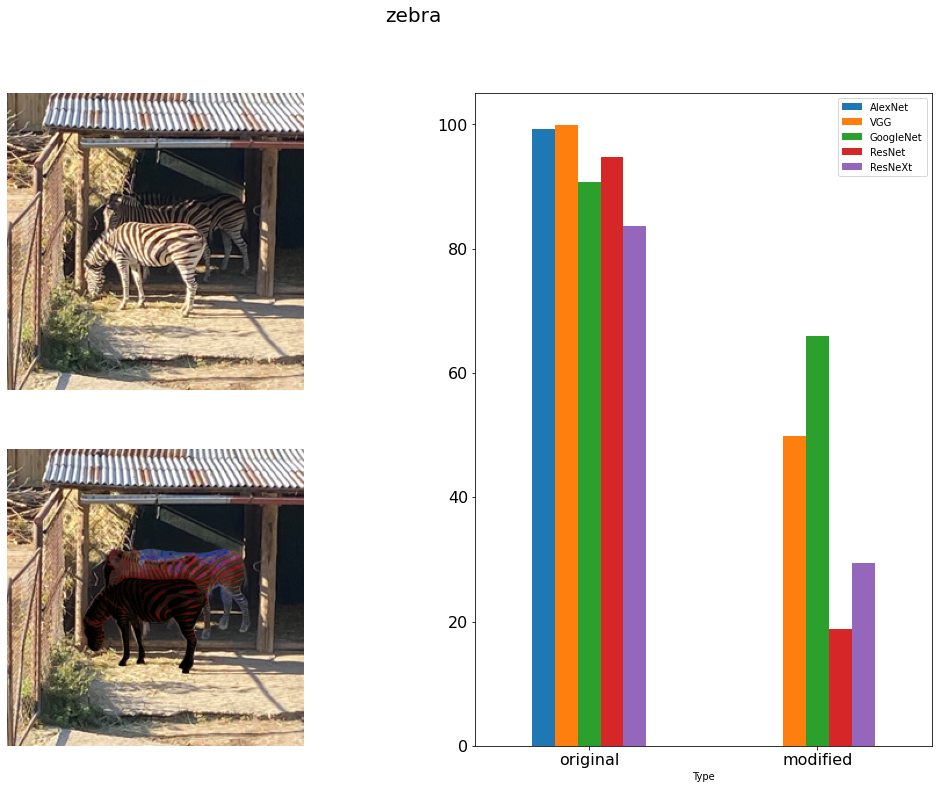

In [55]:
import csv
import pandas as pd

for img in originals:
    # Opening or creating csv file to store results
    filename = "{}.csv".format(img)
    result = open(filename, 'w')
    filewriter = csv.writer(result, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Type', 'AlexNet', 'VGG', 'GoogleNet', 'ResNet', 'ResNeXt'])
    
    # Recognition and writing to file
    
    row = []
    row.append('original')
    img_t = transform(originals[img])
    batch_t = torch.unsqueeze(img_t, 0)
    for model in model_dict:
        model_dict[model].eval()
        out = model_dict[model](batch_t)
        _, indices = torch.sort(out, descending=True)
        percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
        found = 0
        for idx in indices[0][:5]:
            if classes[idx].lower().find(img.lower()) >= 0:
                found = percentage[idx].item()
                break
        row.append(found)
    try:
        filewriter.writerow(row)
    except:
        print(error)

    row = []
    row.append('modified')
    img_t = transform(modified[img])
    batch_t = torch.unsqueeze(img_t, 0)
    for model in model_dict:
        model_dict[model].eval()
        out = model_dict[model](batch_t)
        _, indices = torch.sort(out, descending=True)
        percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
        found = 0
        for idx in indices[0][:5]:
            if classes[idx].lower().find(img.lower()) >= 0:
                found = percentage[idx].item()
                break
        row.append(found)
    try:
        filewriter.writerow(row)
    except:
        print(error)
    
    result.close()

    # Display result

    fig = plt.figure(figsize=(18, 12))
    fig.suptitle(img, fontsize=20)

    original = plt.subplot2grid((2, 2), (0, 0))
    original.imshow(originals[img])
    original.axis("off")

    modified_img = plt.subplot2grid((2, 2), (1, 0))
    modified_img.imshow(modified[img])
    modified_img.axis("off")

    graph = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    df = pd.read_csv(filename)
    df.plot(x="Type", y=['AlexNet', 'VGG', 'GoogleNet', 'ResNet', 'ResNeXt'], kind="bar", rot=0, ax=graph, fontsize=16)
'DONE'
